## Analysis of Robinhood Portfolio

Project by: Pete Aguirre II

In this project, I will do a retuern:risk analysis on my current Robinhood stock portfolio with the help of multiple 
tools using:
- Python 3
- Jupyter Lab/Notebook
- Beautiful Soup
- Markowitz Efficent Frontier

In [1]:
# Libraries Used 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data as wb
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq

# Magic
%matplotlib inline

## 1.) Data Collection (Portfolio fr. Robinhood)

Obtain portfolio from Robinhood using BeautifulSoup4. 

In [2]:
# On robinhood.com/account, begin copy and paste from html:
# <div class="_35i1NVinE8wTOLz3sUynSw"><header class="_1rWpCWWqvbg316kwNPlwYi">
# Note(s): I had to manipulate some html text in able to extract a span that
#          does not contain an attribute. I named it as: class="filler".
# Change:    <div class="_1bZB-iudENk38jTXhs7BIB"><span>
# Change to: <div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">
#       Another one was added for Total Return, called: class="filler2"
# Change:    </svg><span><span>
# Change to: </svg><span><span class="filler2">
html_doc = '''<div class="_35i1NVinE8wTOLz3sUynSw"><header class="_1rWpCWWqvbg316kwNPlwYi"><div class="_2YdFPnDqXSoDKmQtq28ML- _2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1"><span class="css-h74qi0"><span class="css-13vshb9"><span class="css-1k2rdgi">Name</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div><div class="_2-4BkMtIykh6hAhu1CkOAi _2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1"><span class="css-h74qi0"><span class="css-13vshb9"><span class="css-1k2rdgi">Symbol</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div><div class="_2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1"><span class="css-h74qi0"><span class="css-13vshb9"><span class="css-1k2rdgi">Shares</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div><div class="_1aY3uEJAcFViGgVc3SRz4d _2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1"><span class="css-h74qi0"><span class="css-13vshb9"><span class="css-1k2rdgi">Price</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div><div class="_2gJfY0FDaI4PWOsRbu1PPj _2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1"><span class="css-h74qi0"><span class="css-13vshb9"><span class="css-1k2rdgi">Average Cost</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div><div class="Ue-PUFBPXUbpP5zhTrFKT _3QouEAcfZir2lV5xvc_C0b css-b8vnd1"><span class="css-zc0oik"><span class="css-13vshb9"><span class="css-1k2rdgi">Total Return</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1n5qlcf" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div><div class="atrP1y1y_C9ULHV4BSwFj _2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1"><span class="css-h74qi0"><span class="css-13vshb9"><span class="css-1k2rdgi">Equity</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div></header><div><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB" rel="" href="/stocks/AMZN"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Amazon</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">AMZN</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">1</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$3,193.89</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$2,978.48</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$215.41</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$3,193.89</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/AAPL"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Apple</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">AAPL</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">5</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$439.45</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$400.55</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$194.48</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$2,197.25</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/BABA"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Alibaba</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">BABA</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">10</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$265.00</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$246.09</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$189.14</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$2,650.00</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/BA"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Boeing</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">BA</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">5</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$175.31</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$160.64</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$73.35</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$876.55</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/XOM"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Exxon Mobil</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">XOM</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">20</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$43.94</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$42.41</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$30.60</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$878.80</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/DAL"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Delta Air Lines</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">DAL</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">15</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$27.00</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$25.03</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$29.58</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$405.00</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/LUV"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Southwest Airlines</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">LUV</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">15</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$33.62</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$31.72</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$28.54</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$504.30</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/PFE"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Pfizer</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">PFE</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">10</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$39.00</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$36.96</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$20.37</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$390.00</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/JD"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">JD.com</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">JD</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">5</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$65.52</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$64.17</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$6.75</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$327.60</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/AGNC"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">AGNC Investment</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">AGNC</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">15</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$13.67</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$13.65</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$0.33</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$205.05</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/AZN"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">AstraZeneca</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">AZN</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">10</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$56.12</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$56.58</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq _2mbK0Mw-5HM4q7eeuDqOau" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$4.57</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$561.20</span></div></div></div></div></a></div></div>'''

In [ ]:
soup = soup(html_doc, 'html.parser')
print(soup.prettify()[0:50000])

In [4]:
# Extracting headers
headers_txt = []
headers = soup.find_all('span', {'class':'css-1k2rdgi'})
for i in range(len(headers)):
    headers_txt.append(headers[i].text)
    
my_portfolio = pd.DataFrame(columns=[headers_txt])
my_portfolio

,Name,Symbol,Shares,Price,Average Cost,Total Return,Equity


In [5]:
# Extracting company names
names_txt = []
names = soup.find_all('span', {'class':'_2jKxrvkjD73sLQEfH5NTgT'})

for i in range(len(names)):
    names_txt.append(names[i].text)
names_txt = np.array(names_txt)
#names_txt

In [6]:
# Extracting company tickers
ticks_txt = []
ticks = soup.find_all('span', {'class':'_2-4BkMtIykh6hAhu1CkOAi'})

for i in range(len(ticks)):
    ticks_txt.append(ticks[i].text)
ticks_txt = np.array(ticks_txt)
#ticks_txt

In [7]:
# Extracting company shares
shares_txt = []
shares = soup.find_all('span', {'class':'filler'})

for i in range(len(shares)):
    shares_txt.append(int(float(shares[i].text)))
shares_txt = np.array(shares_txt)
#shares_txt

In [8]:
# Extracting company prices
prices_txt = []
prices = soup.find_all('span', {'class':'_1aY3uEJAcFViGgVc3SRz4d'})

for i in range(len(prices)):
    prices_txt.append(prices[i].text)
prices_txt = np.array(prices_txt)
#prices_txt

In [9]:
# Extracting average price obtained
avg_txt = []
avg = soup.find_all('span', {'class':'_2gJfY0FDaI4PWOsRbu1PPj'})

for i in range(len(avg)):
    avg_txt.append(avg[i].text)
avg_txt = np.array(avg_txt)
#avg_txt

In [10]:
# Extracting total return
returns_txt = []
returns = soup.find_all('span', {'class':'filler2'})

for i in range(len(returns)):
    returns_txt.append(returns[i].text)
returns_txt = np.array(returns_txt)
#returns_txt

In [11]:
# Extracting equity
equity_txt = []
equity = soup.find_all('span', {'class':'atrP1y1y_C9ULHV4BSwFj'})

for i in range(len(ticks)):
    equity_txt.append(equity[i].text)
equity_txt = np.array(equity_txt)
#equity_txt

In [12]:
my_portfolio = pd.DataFrame({'Name':names_txt, 'Symbol':ticks_txt, 'Shares':shares_txt, 'Price':prices_txt, 'Average Cost':avg_txt, 'Total Return':returns_txt, 'Equity':equity_txt})
my_portfolio

,Name,Symbol,Shares,Price,Average Cost,Total Return,Equity
0,Amazon,AMZN,1,"$3,193.89","$2,978.48",$215.41,"$3,193.89"
1,Apple,AAPL,5,$439.45,$400.55,$194.48,"$2,197.25"
2,Alibaba,BABA,10,$265.00,$246.09,$189.14,"$2,650.00"
3,Boeing,BA,5,$175.31,$160.64,$73.35,$876.55
4,Exxon Mobil,XOM,20,$43.94,$42.41,$30.60,$878.80
5,Delta Air Lines,DAL,15,$27.00,$25.03,$29.58,$405.00
6,Southwest Airlines,LUV,15,$33.62,$31.72,$28.54,$504.30
7,Pfizer,PFE,10,$39.00,$36.96,$20.37,$390.00
8,JD.com,JD,5,$65.52,$64.17,$6.75,$327.60
9,AGNC Investment,AGNC,15,$13.67,$13.65,$0.33,$205.05


In [13]:
my_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          11 non-null     object
 1   Symbol        11 non-null     object
 2   Shares        11 non-null     int32 
 3   Price         11 non-null     object
 4   Average Cost  11 non-null     object
 5   Total Return  11 non-null     object
 6   Equity        11 non-null     object
dtypes: int32(1), object(6)
memory usage: 700.0+ bytes


## 2.) Data Cleaning

In [14]:
# Take out all dollar signs in data
# Note: Running this a second time will create an error since the 
#       values would have already been converted to floats
dollar_sign = ['Price', 'Average Cost', 'Total Return', 'Equity']
for d in dollar_sign:
    my_portfolio[d] = my_portfolio[d].str.replace(",", "")
    my_portfolio[d] = my_portfolio[d].str.replace("$", "")
    my_portfolio[d] = pd.to_numeric(my_portfolio[d])

In [15]:
# Confirm that values needed has been converted to floats
my_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          11 non-null     object 
 1   Symbol        11 non-null     object 
 2   Shares        11 non-null     int32  
 3   Price         11 non-null     float64
 4   Average Cost  11 non-null     float64
 5   Total Return  11 non-null     float64
 6   Equity        11 non-null     float64
dtypes: float64(4), int32(1), object(2)
memory usage: 700.0+ bytes


In [16]:
my_portfolio

,Name,Symbol,Shares,Price,Average Cost,Total Return,Equity
0,Amazon,AMZN,1,3193.89,2978.48,215.41,3193.89
1,Apple,AAPL,5,439.45,400.55,194.48,2197.25
2,Alibaba,BABA,10,265.00,246.09,189.14,2650.00
3,Boeing,BA,5,175.31,160.64,73.35,876.55
4,Exxon Mobil,XOM,20,43.94,42.41,30.60,878.80
5,Delta Air Lines,DAL,15,27.00,25.03,29.58,405.00
6,Southwest Airlines,LUV,15,33.62,31.72,28.54,504.30
7,Pfizer,PFE,10,39.00,36.96,20.37,390.00
8,JD.com,JD,5,65.52,64.17,6.75,327.60
9,AGNC Investment,AGNC,15,13.67,13.65,0.33,205.05


In [17]:
# Convert any '.' to '-' in symbols
#sym = my_portfolio['Symbol']
tick_new = my_portfolio['Symbol'].str.replace(".", "-")

In [18]:
# Confirm that '.' has been replaced by '-' on symbol
my_portfolio

,Name,Symbol,Shares,Price,Average Cost,Total Return,Equity
0,Amazon,AMZN,1,3193.89,2978.48,215.41,3193.89
1,Apple,AAPL,5,439.45,400.55,194.48,2197.25
2,Alibaba,BABA,10,265.00,246.09,189.14,2650.00
3,Boeing,BA,5,175.31,160.64,73.35,876.55
4,Exxon Mobil,XOM,20,43.94,42.41,30.60,878.80
5,Delta Air Lines,DAL,15,27.00,25.03,29.58,405.00
6,Southwest Airlines,LUV,15,33.62,31.72,28.54,504.30
7,Pfizer,PFE,10,39.00,36.96,20.37,390.00
8,JD.com,JD,5,65.52,64.17,6.75,327.60
9,AGNC Investment,AGNC,15,13.67,13.65,0.33,205.05


In [19]:
# EXTRA DATA GATHERING HERE

total_sum = (my_portfolio['Average Cost']*my_portfolio['Shares']).sum()
weights = []
for i in range(len(my_portfolio)):
    weights.append(round((my_portfolio['Average Cost'][i]*my_portfolio['Shares'][i])/total_sum, 2))
    
my_portfolio = pd.DataFrame({'Name':names_txt, 'Symbol':tick_new, 'Shares':shares_txt, 'Price':prices_txt, 'Average Cost':avg_txt, 'Total Return':returns_txt, 'Equity':equity_txt, 'Weight':weights})
my_portfolio

,Name,Symbol,Shares,Price,Average Cost,Total Return,Equity,Weight
0,Amazon,AMZN,1,"$3,193.89","$2,978.48",$215.41,"$3,193.89",0.26
1,Apple,AAPL,5,$439.45,$400.55,$194.48,"$2,197.25",0.18
2,Alibaba,BABA,10,$265.00,$246.09,$189.14,"$2,650.00",0.22
3,Boeing,BA,5,$175.31,$160.64,$73.35,$876.55,0.07
4,Exxon Mobil,XOM,20,$43.94,$42.41,$30.60,$878.80,0.07
5,Delta Air Lines,DAL,15,$27.00,$25.03,$29.58,$405.00,0.03
6,Southwest Airlines,LUV,15,$33.62,$31.72,$28.54,$504.30,0.04
7,Pfizer,PFE,10,$39.00,$36.96,$20.37,$390.00,0.03
8,JD.com,JD,5,$65.52,$64.17,$6.75,$327.60,0.03
9,AGNC Investment,AGNC,15,$13.67,$13.65,$0.33,$205.05,0.02


In [50]:
my_portfolio['Weight'].sum()
my_portfolio.to_csv('portfolio.csv')

## For manually obtained CSV

In [ ]:
my_portfolio = pd.read_csv('hypothetical_portfolio.csv')
my_portfolio

In [ ]:
#dollar_sign = ['Average Cost', 'Total Return', 'Equity']
#for d in dollar_sign:
#    my_portfolio[d] = pd.to_numeric(my_portfolio[d])
my_portfolio.info()

In [ ]:
# Only run to download weights
total_sum = (my_portfolio['Average Cost']*my_portfolio['Shares']).sum()
weights = []
for i in range(len(my_portfolio)):
    weights.append(round((my_portfolio['Average Cost'][i]*my_portfolio['Shares'][i])/total_sum, 2))
    
#my_portfolio = pd.DataFrame({'Name':names_txt, 'Symbol':tick_new, 'Shares':shares_txt, 'Average Cost':avg_txt, 'Total Return':returns_txt, 'Equity':equity_txt, 'Weight':weights})
weights = pd.DataFrame({'Weights': weights})
weights.to_csv('weights.csv', index=False)


## 3.) Data Collection (Historical Prices)

In [21]:
# Collect historical prices
tickers = my_portfolio['Symbol']
start_date = '2000-01-01'
my_data = pd.DataFrame()
for t in tickers:
    my_data[t] = wb.DataReader(t, data_source='yahoo', start=start_date)['Adj Close']

In [22]:
my_data = my_data.dropna()
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1480 entries, 2014-09-19 to 2020-08-05
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1480 non-null   float64
 1   AAPL    1480 non-null   float64
 2   BABA    1480 non-null   float64
 3   BA      1480 non-null   float64
 4   XOM     1480 non-null   float64
 5   DAL     1480 non-null   float64
 6   LUV     1480 non-null   float64
 7   PFE     1480 non-null   float64
 8   JD      1480 non-null   float64
 9   AGNC    1480 non-null   float64
 10  AZN     1480 non-null   float64
dtypes: float64(11)
memory usage: 138.8 KB


In [23]:
sec_returns = np.log(my_data/my_data.shift(1))
sec_returns

sec_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1480 entries, 2014-09-19 to 2020-08-05
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1479 non-null   float64
 1   AAPL    1479 non-null   float64
 2   BABA    1479 non-null   float64
 3   BA      1479 non-null   float64
 4   XOM     1479 non-null   float64
 5   DAL     1479 non-null   float64
 6   LUV     1479 non-null   float64
 7   PFE     1479 non-null   float64
 8   JD      1479 non-null   float64
 9   AGNC    1479 non-null   float64
 10  AZN     1479 non-null   float64
dtypes: float64(11)
memory usage: 138.8 KB


In [24]:
sec_returns.head()

,AMZN,AAPL,BABA,BA,XOM,DAL,LUV,PFE,JD,AGNC,AZN
Date,,,,,,,,,,,
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,-0.020799,0.000990,-0.043537,-0.005737,-0.005990,-0.018019,-0.011934,-0.007263,-0.049902,-0.009394,-0.000669
2014-09-23,-0.002685,0.015513,-0.030726,-0.009610,-0.005297,-0.006609,-0.026407,-0.004317,-0.014942,-0.003602,-0.048569
2014-09-24,0.014053,-0.008709,0.038263,0.009377,-0.002189,-0.001062,0.031664,0.008615,0.022699,-0.003615,0.007424
2014-09-25,-0.019320,-0.038879,-0.018386,-0.011262,-0.016521,-0.026912,-0.020304,-0.010947,-0.022699,0.000452,-0.009394


In [25]:
sec_returns.tail()

,AMZN,AAPL,BABA,BA,XOM,DAL,LUV,PFE,JD,AGNC,AZN
Date,,,,,,,,,,,
2020-07-30,0.006031,0.012028,0.001148,-0.024760,-0.050302,-0.030796,-0.026456,-0.003607,-0.004805,-0.002200,0.021829
2020-07-31,0.036294,0.099564,-0.006829,-0.024693,0.005003,0.001202,-0.002264,-0.006734,0.023796,-0.001469,-0.037129
2020-08-03,-0.016822,0.024885,0.027194,0.026667,0.004032,0.009169,0.022092,-0.003384,0.011534,0.010241,0.018473
2020-08-04,0.008620,0.006656,0.016381,0.017108,0.028467,0.018479,-0.005716,0.001043,0.000620,-0.013187,-0.013109
2020-08-05,0.020871,0.003618,0.010283,0.054294,0.008704,0.030689,0.041179,0.001562,0.014605,0.013187,-0.002321


## Data Analysis

In [26]:
sec_returns

,AMZN,AAPL,BABA,BA,XOM,DAL,LUV,PFE,JD,AGNC,AZN
Date,,,,,,,,,,,
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,-0.020799,0.000990,-0.043537,-0.005737,-0.005990,-0.018019,-0.011934,-0.007263,-0.049902,-0.009394,-0.000669
2014-09-23,-0.002685,0.015513,-0.030726,-0.009610,-0.005297,-0.006609,-0.026407,-0.004317,-0.014942,-0.003602,-0.048569
2014-09-24,0.014053,-0.008709,0.038263,0.009377,-0.002189,-0.001062,0.031664,0.008615,0.022699,-0.003615,0.007424
2014-09-25,-0.019320,-0.038879,-0.018386,-0.011262,-0.016521,-0.026912,-0.020304,-0.010947,-0.022699,0.000452,-0.009394
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-30,0.006031,0.012028,0.001148,-0.024760,-0.050302,-0.030796,-0.026456,-0.003607,-0.004805,-0.002200,0.021829
2020-07-31,0.036294,0.099564,-0.006829,-0.024693,0.005003,0.001202,-0.002264,-0.006734,0.023796,-0.001469,-0.037129
2020-08-03,-0.016822,0.024885,0.027194,0.026667,0.004032,0.009169,0.022092,-0.003384,0.011534,0.010241,0.018473


In [27]:
for t in tickers:

    
    print("")
    print("#",t)
    print("DAILY")
    print("Daily Return:", round(sec_returns[t].mean()*100, 4), "%")
    print("Daily Risk:", round(sec_returns[t].std()*100, 4), "%")

    print("")

    print("ANNUAL")
    mean_return = round((sec_returns[t].mean()*250)*100, 4)
    std_return = round((sec_returns[t].std()*250**.5)*100, 4)
    print("Annual Return:", mean_return, "%")
    print("Annual Risk:", std_return, "%")
    

    
    


# AMZN
DAILY
Daily Return: 0.1534 %
Daily Risk: 1.9136 %

ANNUAL
Annual Return: 38.3602 %
Annual Risk: 30.2568 %

# AAPL
DAILY
Daily Return: 0.1059 %
Daily Risk: 1.7966 %

ANNUAL
Annual Return: 26.4822 %
Annual Risk: 28.4073 %

# BABA
DAILY
Daily Return: 0.0701 %
Daily Risk: 2.0601 %

ANNUAL
Annual Return: 17.5332 %
Annual Risk: 32.5731 %

# BA
DAILY
Daily Return: 0.0301 %
Daily Risk: 2.6034 %

ANNUAL
Annual Return: 7.5324 %
Annual Risk: 41.1632 %

# XOM
DAILY
Daily Return: -0.038 %
Daily Risk: 1.6522 %

ANNUAL
Annual Return: -9.4883 %
Annual Risk: 26.1237 %

# DAL
DAILY
Daily Return: -0.0183 %
Daily Risk: 2.5757 %

ANNUAL
Annual Return: -4.5792 %
Annual Risk: 40.7257 %

# LUV
DAILY
Daily Return: -0.0001 %
Daily Risk: 2.2542 %

ANNUAL
Annual Return: -0.019 %
Annual Risk: 35.6413 %

# PFE
DAILY
Daily Return: 0.0307 %
Daily Risk: 1.3417 %

ANNUAL
Annual Return: 7.6649 %
Annual Risk: 21.2136 %

# JD
DAILY
Daily Return: 0.0566 %
Daily Risk: 2.613 %

ANNUAL
Annual Return: 14.1604 %
Annual 

In [28]:
sec_returns.idxmin() 

AMZN   2014-10-24
AAPL   2020-03-16
BABA   2015-01-29
BA     2020-03-16
XOM    2020-03-09
DAL    2020-03-18
LUV    2020-03-12
PFE    2020-03-16
JD     2020-03-16
AGNC   2020-03-12
AZN    2017-07-27
dtype: datetime64[ns]

In [29]:
sec_returns.idxmax()

AMZN   2015-04-24
AAPL   2020-03-13
BABA   2017-06-08
BA     2020-03-25
XOM    2020-03-24
DAL    2020-03-24
LUV    2020-03-13
PFE    2020-03-13
JD     2019-08-13
AGNC   2020-03-25
AZN    2019-02-14
dtype: datetime64[ns]

In [30]:
# Covariance 
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = sec_returns.cov()
return_cov

,AMZN,AAPL,BABA,BA,XOM,DAL,LUV,PFE,JD,AGNC,AZN
AMZN,0.000366,0.000184,0.000189,0.000145,0.000094,0.000113,0.000106,0.000081,0.000224,0.000052,0.000086
AAPL,0.000184,0.000323,0.000173,0.000212,0.000137,0.000179,0.000153,0.000101,0.000212,0.000079,0.000104
BABA,0.000189,0.000173,0.000424,0.000174,0.000106,0.000164,0.000136,0.000076,0.000337,0.000052,0.000089
BA,0.000145,0.000212,0.000174,0.000678,0.000242,0.000420,0.000327,0.000129,0.000205,0.000211,0.000109
XOM,0.000094,0.000137,0.000106,0.000242,0.000273,0.000187,0.000148,0.000093,0.000129,0.000110,0.000077
DAL,0.000113,0.000179,0.000164,0.000420,0.000187,0.000663,0.000448,0.000115,0.000173,0.000191,0.000100
LUV,0.000106,0.000153,0.000136,0.000327,0.000148,0.000448,0.000508,0.000102,0.000164,0.000135,0.000089
PFE,0.000081,0.000101,0.000076,0.000129,0.000093,0.000115,0.000102,0.000180,0.000090,0.000053,0.000089
JD,0.000224,0.000212,0.000337,0.000205,0.000129,0.000173,0.000164,0.000090,0.000683,0.000062,0.000101
AGNC,0.000052,0.000079,0.000052,0.000211,0.000110,0.000191,0.000135,0.000053,0.000062,0.000231,0.000050


In [31]:
# Covariance 
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = sec_returns.cov()*250
return_cov

,AMZN,AAPL,BABA,BA,XOM,DAL,LUV,PFE,JD,AGNC,AZN
AMZN,0.091547,0.045882,0.047222,0.036166,0.023403,0.028127,0.026508,0.020169,0.055900,0.012888,0.021421
AAPL,0.045882,0.080698,0.043173,0.053035,0.034368,0.044734,0.038207,0.025282,0.053027,0.019772,0.026098
BABA,0.047222,0.043173,0.106100,0.043497,0.026479,0.041017,0.034080,0.018913,0.084183,0.013077,0.022246
BA,0.036166,0.053035,0.043497,0.169441,0.060478,0.105102,0.081841,0.032130,0.051269,0.052625,0.027236
XOM,0.023403,0.034368,0.026479,0.060478,0.068245,0.046750,0.037047,0.023355,0.032305,0.027463,0.019317
DAL,0.028127,0.044734,0.041017,0.105102,0.046750,0.165858,0.111969,0.028708,0.043363,0.047726,0.024889
LUV,0.026508,0.038207,0.034080,0.081841,0.037047,0.111969,0.127030,0.025442,0.041006,0.033790,0.022319
PFE,0.020169,0.025282,0.018913,0.032130,0.023355,0.028708,0.025442,0.045002,0.022387,0.013179,0.022368
JD,0.055900,0.053027,0.084183,0.051269,0.032305,0.043363,0.041006,0.022387,0.170694,0.015512,0.025206
AGNC,0.012888,0.019772,0.013077,0.052625,0.027463,0.047726,0.033790,0.013179,0.015512,0.057813,0.012587


In [32]:
# Correlations
# Determines how close the relationship are between two stocks
return_corr = sec_returns.corr()
return_corr

,AMZN,AAPL,BABA,BA,XOM,DAL,LUV,PFE,JD,AGNC,AZN
AMZN,1.000000,0.533818,0.479145,0.290382,0.296088,0.228260,0.245815,0.314224,0.447175,0.177156,0.280743
AAPL,0.533818,1.000000,0.466578,0.453547,0.463122,0.386665,0.377362,0.419531,0.451808,0.289473,0.364303
BABA,0.479145,0.466578,1.000000,0.324411,0.311183,0.309196,0.293557,0.273703,0.625540,0.166968,0.270819
BA,0.290382,0.453547,0.324411,1.000000,0.562406,0.626951,0.557840,0.367949,0.301463,0.531707,0.262375
XOM,0.296088,0.463122,0.311183,0.562406,1.000000,0.439417,0.397887,0.421444,0.299315,0.437215,0.293211
DAL,0.228260,0.386665,0.309196,0.626951,0.439417,1.000000,0.771391,0.332296,0.257715,0.487388,0.242334
LUV,0.245815,0.377362,0.293557,0.557840,0.397887,0.771391,1.000000,0.336496,0.278473,0.394300,0.248312
PFE,0.314224,0.419531,0.273703,0.367949,0.421444,0.332296,0.336496,1.000000,0.255427,0.258385,0.418118
JD,0.447175,0.451808,0.625540,0.301463,0.299315,0.257715,0.278473,0.255427,1.000000,0.156148,0.241928
AGNC,0.177156,0.289473,0.166968,0.531707,0.437215,0.487388,0.394300,0.258385,0.156148,1.000000,0.207585


In [33]:
# Calculating Diversifiable and Non-Diversifiable

# Portfolio variance
pflio_var = np.dot(my_portfolio['Weight'].T, np.dot(sec_returns.cov()*250, my_portfolio['Weight']))
print("Portfolio Variance", pflio_var)

# Portfolio volatility 
pflio_vol = (np.dot(my_portfolio['Weight'].T, np.dot(sec_returns.cov()*250, my_portfolio['Weight'])))**.5
print("Portfolio Volatility:", pflio_vol)

# Calculating variance annually for each tickers
var_a = []
for t in tickers:
    var_a.append(sec_returns[t].var()*250)

var_a = np.array(var_a)
variances = pd.DataFrame({'Name':names_txt, 'Variance':var_a})

# Diversifiable Risk
# div_risk = pflio_var - my_portfolio['Weight'][0]**2*variances['Variance'][0] - ...
#                  ... - my_portfolio['Weight'][n]**2*variances['Variance'][n]
div_risk = 0   
for i in range(len(my_portfolio)):
    div_risk -= my_portfolio['Weight'][i]**2*variances['Variance'][i]
    #print(my_portfolio['Name'][i], div_risk)
div_risk = pflio_var - div_risk
print("Diversifiable Risk:", div_risk)

# Non Diversifiable Risk
non_div_risk1 = pflio_var - div_risk
print("Non-Diversifiable Risk:", non_div_risk1)

non_div_risk2 = 0
for i in range(len(my_portfolio)):
    non_div_risk2 += my_portfolio['Weight'][i]**2*variances['Variance'][i]
print("Non-Diversifiable Risk:", non_div_risk2)
print("Non-Diversifiable Risk:", non_div_risk2 == non_div_risk1)


##test = my_portfolio['Weight'].diff()
#print(test)

Portfolio Variance 0.04804597397572341
Portfolio Volatility: 0.21919391865588655
Diversifiable Risk: 0.06387785283088758
Non-Diversifiable Risk: -0.01583187885516417
Non-Diversifiable Risk: 0.015831878855164173
Non-Diversifiable Risk: False


In [ ]:
# FOR THE MANUAL MODE
# Calculating Diversifiable and Non-Diversifiable

# Portfolio variance
pflio_var = np.dot(my_portfolio['Weight'].T, np.dot(sec_returns.cov()*250, my_portfolio['Weight']))
print("Portfolio Variance", pflio_var)

# Portfolio volatility 
pflio_vol = (np.dot(my_portfolio['Weight'].T, np.dot(sec_returns.cov()*250, my_portfolio['Weight'])))**.5
print("Portfolio Volatility:", pflio_vol)

# Calculating variance annually for each tickers
var_a = []
for t in tickers:
    var_a.append(sec_returns[t].var()*250)

var_a = np.array(var_a)
variances = pd.DataFrame({'Name':my_portfolio['Name'], 'Variance':var_a})

# Diversifiable Risk
# div_risk = pflio_var - my_portfolio['Weight'][0]**2*variances['Variance'][0] - ...
#                  ... - my_portfolio['Weight'][n]**2*variances['Variance'][n]
div_risk = 0   
div_risk = pflio_var - my_portfolio['Weight'][0]**2*variances['Variance'][0]
for i in range(len(my_portfolio)-1):
    div_risk -= my_portfolio['Weight'][i+1]**2*variances['Variance'][i+1]
    #print(my_portfolio['Name'][i], div_risk)
div_risk = div_risk - my_portfolio['Weight'][len(my_portfolio)-1]**2*variances['Variance'][len(my_portfolio)-1]
print("Diversifiable Risk:", div_risk)

# Non Diversifiable Risk
non_div_risk1 = pflio_var - div_risk
print("Non-Diversifiable Risk:", non_div_risk1)

non_div_risk2 = 0
for i in range(len(my_portfolio)):
    non_div_risk2 += my_portfolio['Weight'][i]**2*variances['Variance'][i]
print("Non-Diversifiable Risk:", non_div_risk2)
print("Non-Diversifiable Risk:", non_div_risk2 == non_div_risk1)


##test = my_portfolio['Weight'].diff()
#print(test)

In [34]:
no_assets = len(tickers)
no_assets

11

In [54]:
pflio_ret = []
pflio_vol = [] 
pflio_wei = []

for x in range(100000):
    weights = np.random.random(no_assets)
    weights /= np.sum(weights)
    
    pflio_wei.append(weights)
    pflio_ret.append(np.sum(weights*sec_returns.mean())*250)
    pflio_vol.append(np.sqrt(np.dot(weights.T, np.dot(sec_returns.cov()*250, weights))))
    #print(x, weights)

pflio_wei = np.array(pflio_wei)
pflio_ret = np.array(pflio_ret)
pflio_vol = np.array(pflio_vol)

#print(np.sum(weights))
#pflio_returns, pflio_volatilities

In [55]:
pflio_scenarios = pd.DataFrame({'Return': pflio_ret, 'Volatility': pflio_vol})
pflio_scenarios = pflio_scenarios.sort_values('Return', ascending=True)

In [59]:
pflio_scenarios.head()
#pflio_scenarios['Return']

,Return,Volatility
44622,0.004339,0.244330
9139,0.008067,0.234846
28805,0.011751,0.216648
61158,0.012333,0.250871
30832,0.012852,0.243488


In [57]:
pflio_scenarios.tail(3500)

,Return,Volatility
53588,0.146098,0.198225
40127,0.146101,0.192275
10569,0.146103,0.205432
10303,0.146107,0.208017
63798,0.146114,0.228192
...,...,...
94782,0.201691,0.212549
67836,0.207282,0.207676
16608,0.208997,0.220937
7558,0.211507,0.228478


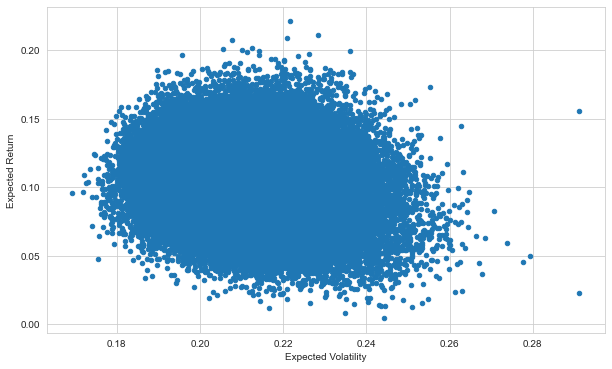

In [58]:
# Efficient Frontier 
pflio_scenarios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
eff_front = plt.savefig("efficient_frontier2.png")

In [60]:
# For Testing purposes
pfolio_wei2 = []
tickers2 = []
print(pflio_wei[19169])
tickers2 = np.array(tickers)
print(tickers2)
print(np.sum(pflio_wei[19169]))
pflio_wei2 = pflio_wei[19169]


#ideal_portfolio = pd.DataFrame(columns=tickers2)
#ideal_portfolio = pd.DataFrame({'Symbol': tickers2, 'Weights': pflio_wei2})
ideal_portfolio = pd.DataFrame({'Weights': pflio_wei2})
ideal_portfolio.to_csv('ideal_weights.csv', index=False)

[0.30850831 0.30561496 0.015162   0.01315823 0.03158419 0.04491076
 0.00929879 0.0045058  0.12283575 0.14318099 0.00124023]
['AMZN' 'AAPL' 'BABA' 'BA' 'XOM' 'DAL' 'LUV' 'PFE' 'JD' 'AGNC' 'AZN']
1.0


## Data Visualization

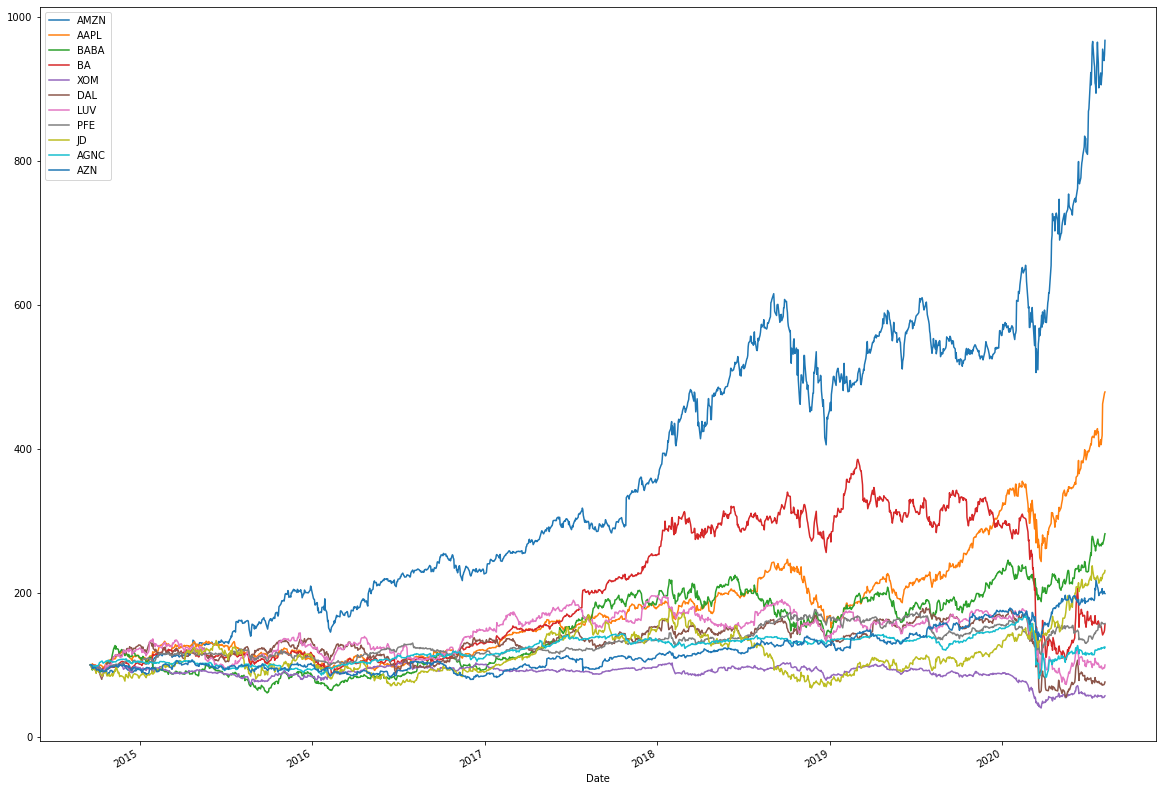

In [46]:
(my_data/my_data.iloc[0]*100).plot(figsize=(20,15))

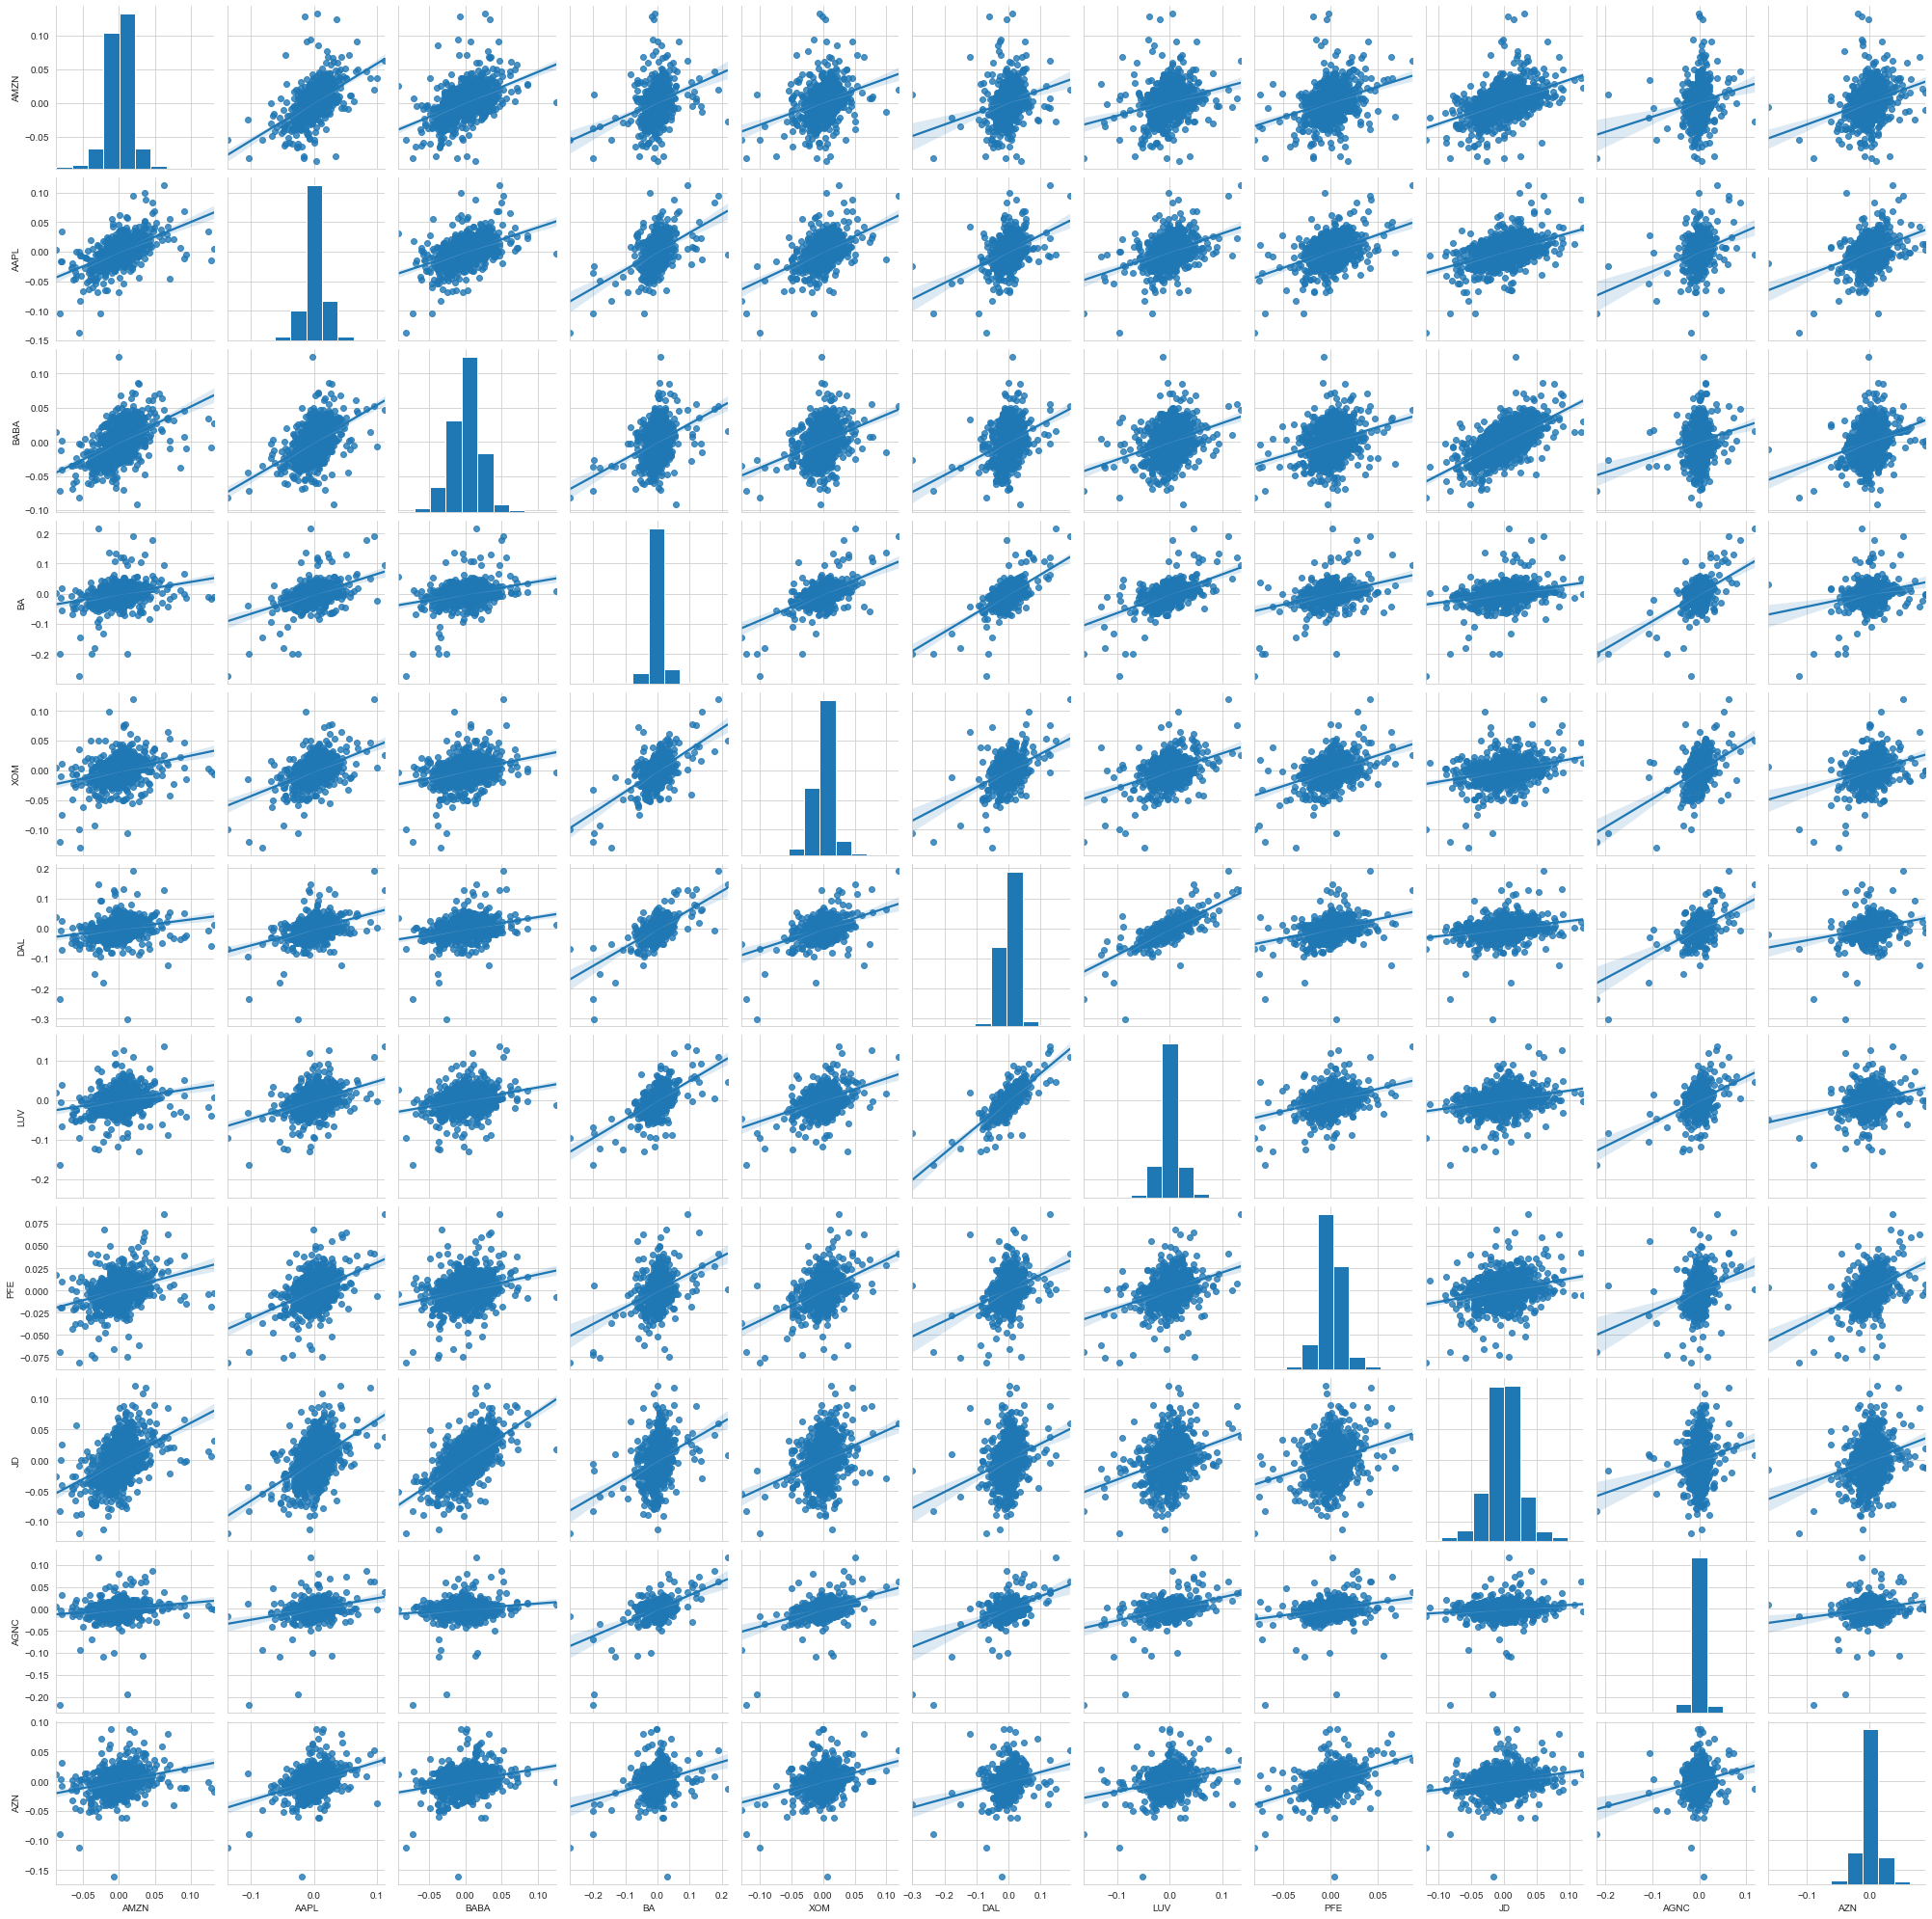

In [48]:
sns.set_style('whitegrid')
regression = sns.pairplot(sec_returns[1:], kind="reg")
regression = regression.savefig("regression.png")
regression

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

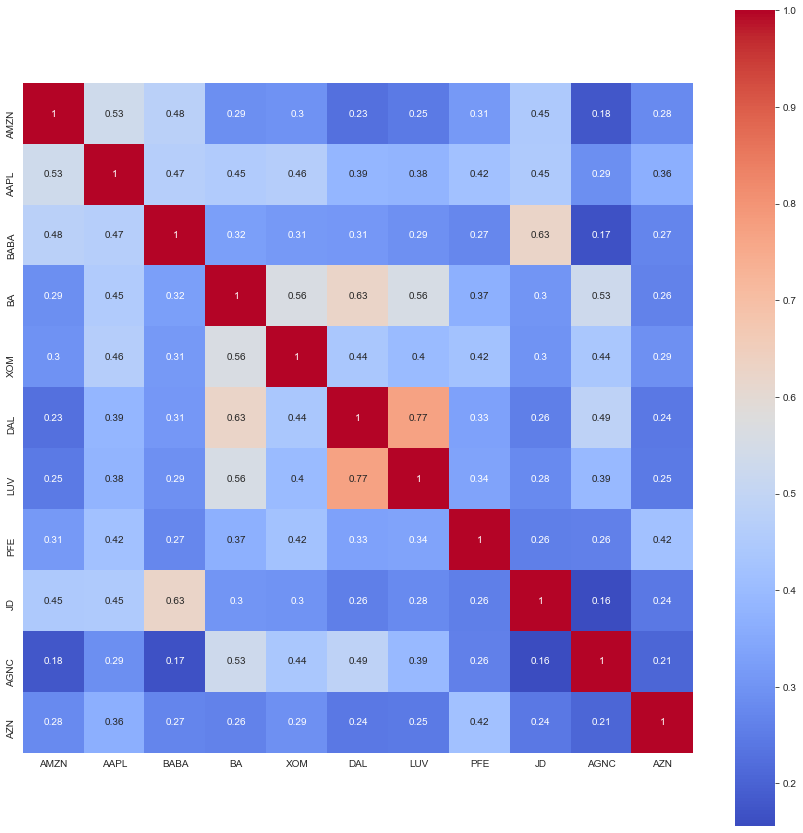

In [52]:
plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(return_corr, annot=True, square=True, cmap='coolwarm')
heatmap.savefig("heatmap.png")
heatmap
#plt.show()